# Kaggle Data Set

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

Pushing using terminal:
1) cd into path
2) add all files to commit ~ git add .
3) commit with message ~ git commit -m "Initial commit"
4) select your branch ~ git branch -M main
5) push ~ git push -u origin main

- Time_spent_Alone: Hours spent alone daily (0–11).
- Stage_fear: Presence of stage fright (Yes/No).
- Social_event_attendance: Frequency of social events (0–10).
- Going_outside: Frequency of going outside (0–7).
- Drained_after_socializing: Feeling drained after socializing (Yes/No).
- Friends_circle_size: Number of close friends (0–15).
- Post_frequency: Social media post frequency (0–10).
- Personality: Target variable (Extrovert/Introvert).*

In [16]:
# pip install pandas

In [17]:
# pip install kagglehub

In [18]:
# pip install xgboost

In [19]:
# pip install scikit-learn

In [32]:
# pip install seaborn

  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 260.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 315.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 311.2 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m6/8 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [51]:
# data manipulation
import pandas as pd
import kagglehub
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# modeling and model evaluation
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [21]:

# Run to get dataset
# Download latest version
# path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

# print("Path to dataset files:", path)

## EDA:

In [22]:
path = '/Users/lucasberth/Documents/Kaggle_data/personality_datasert.csv'

data = pd.read_csv(path)
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [23]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [24]:
# clean data / make data better for modeling


# clean X vars
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# clean Y var
data['Personality'] = data['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [25]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


### Feature Exploration (keeping in mind Extrobert is 1 and Introvert is 0)

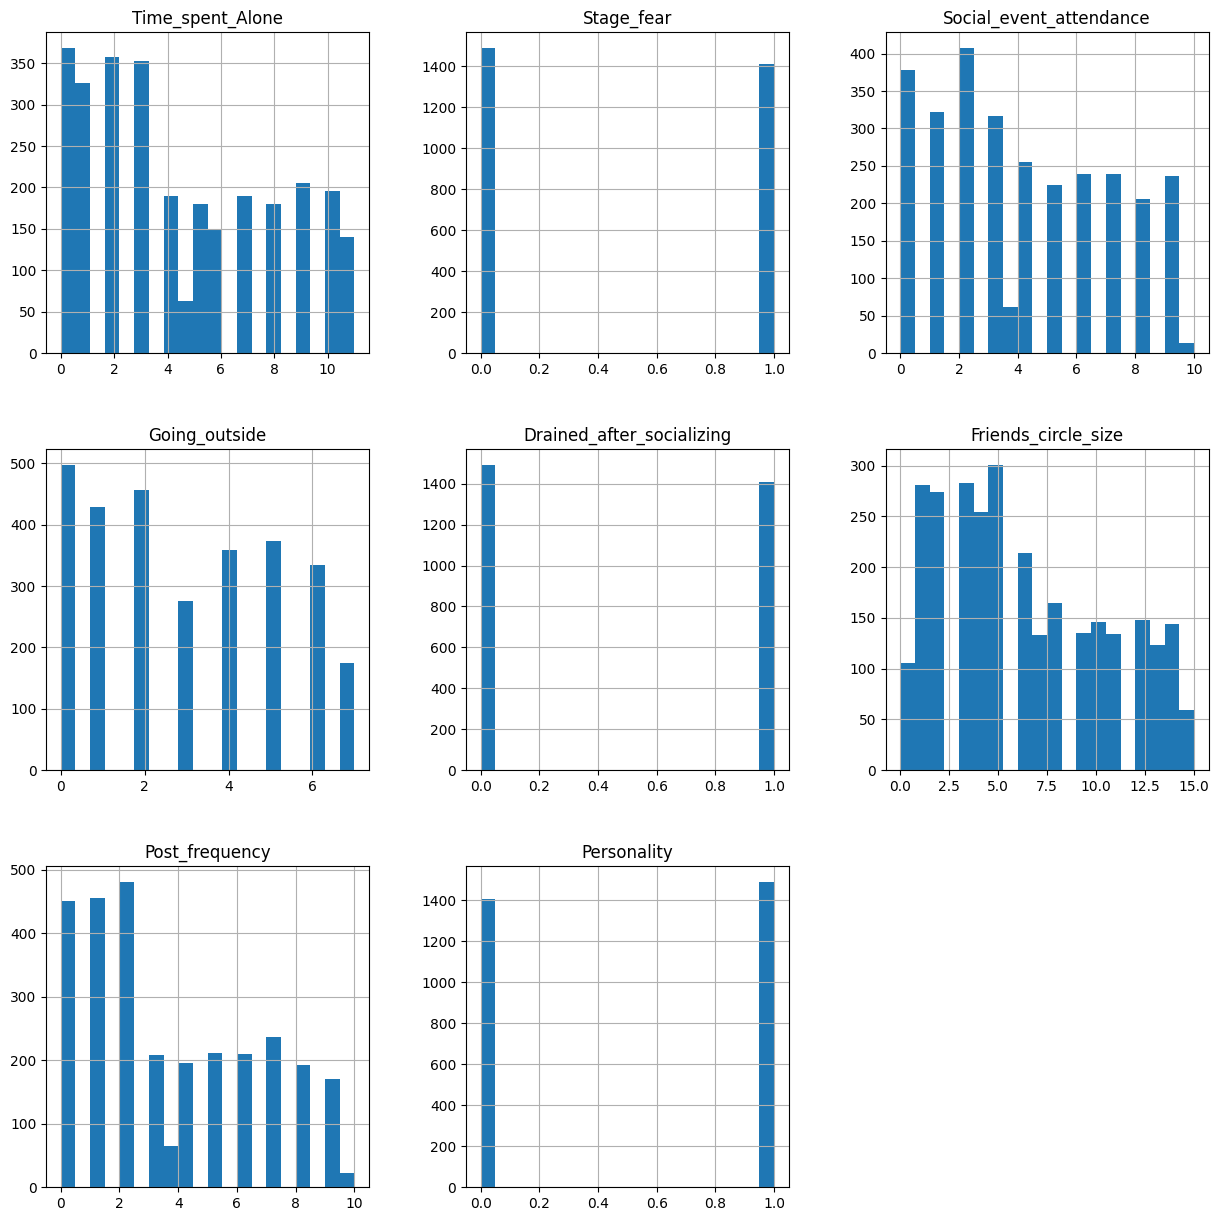

In [49]:
data.hist(bins=20,figsize=(15, 15))
plt.show()

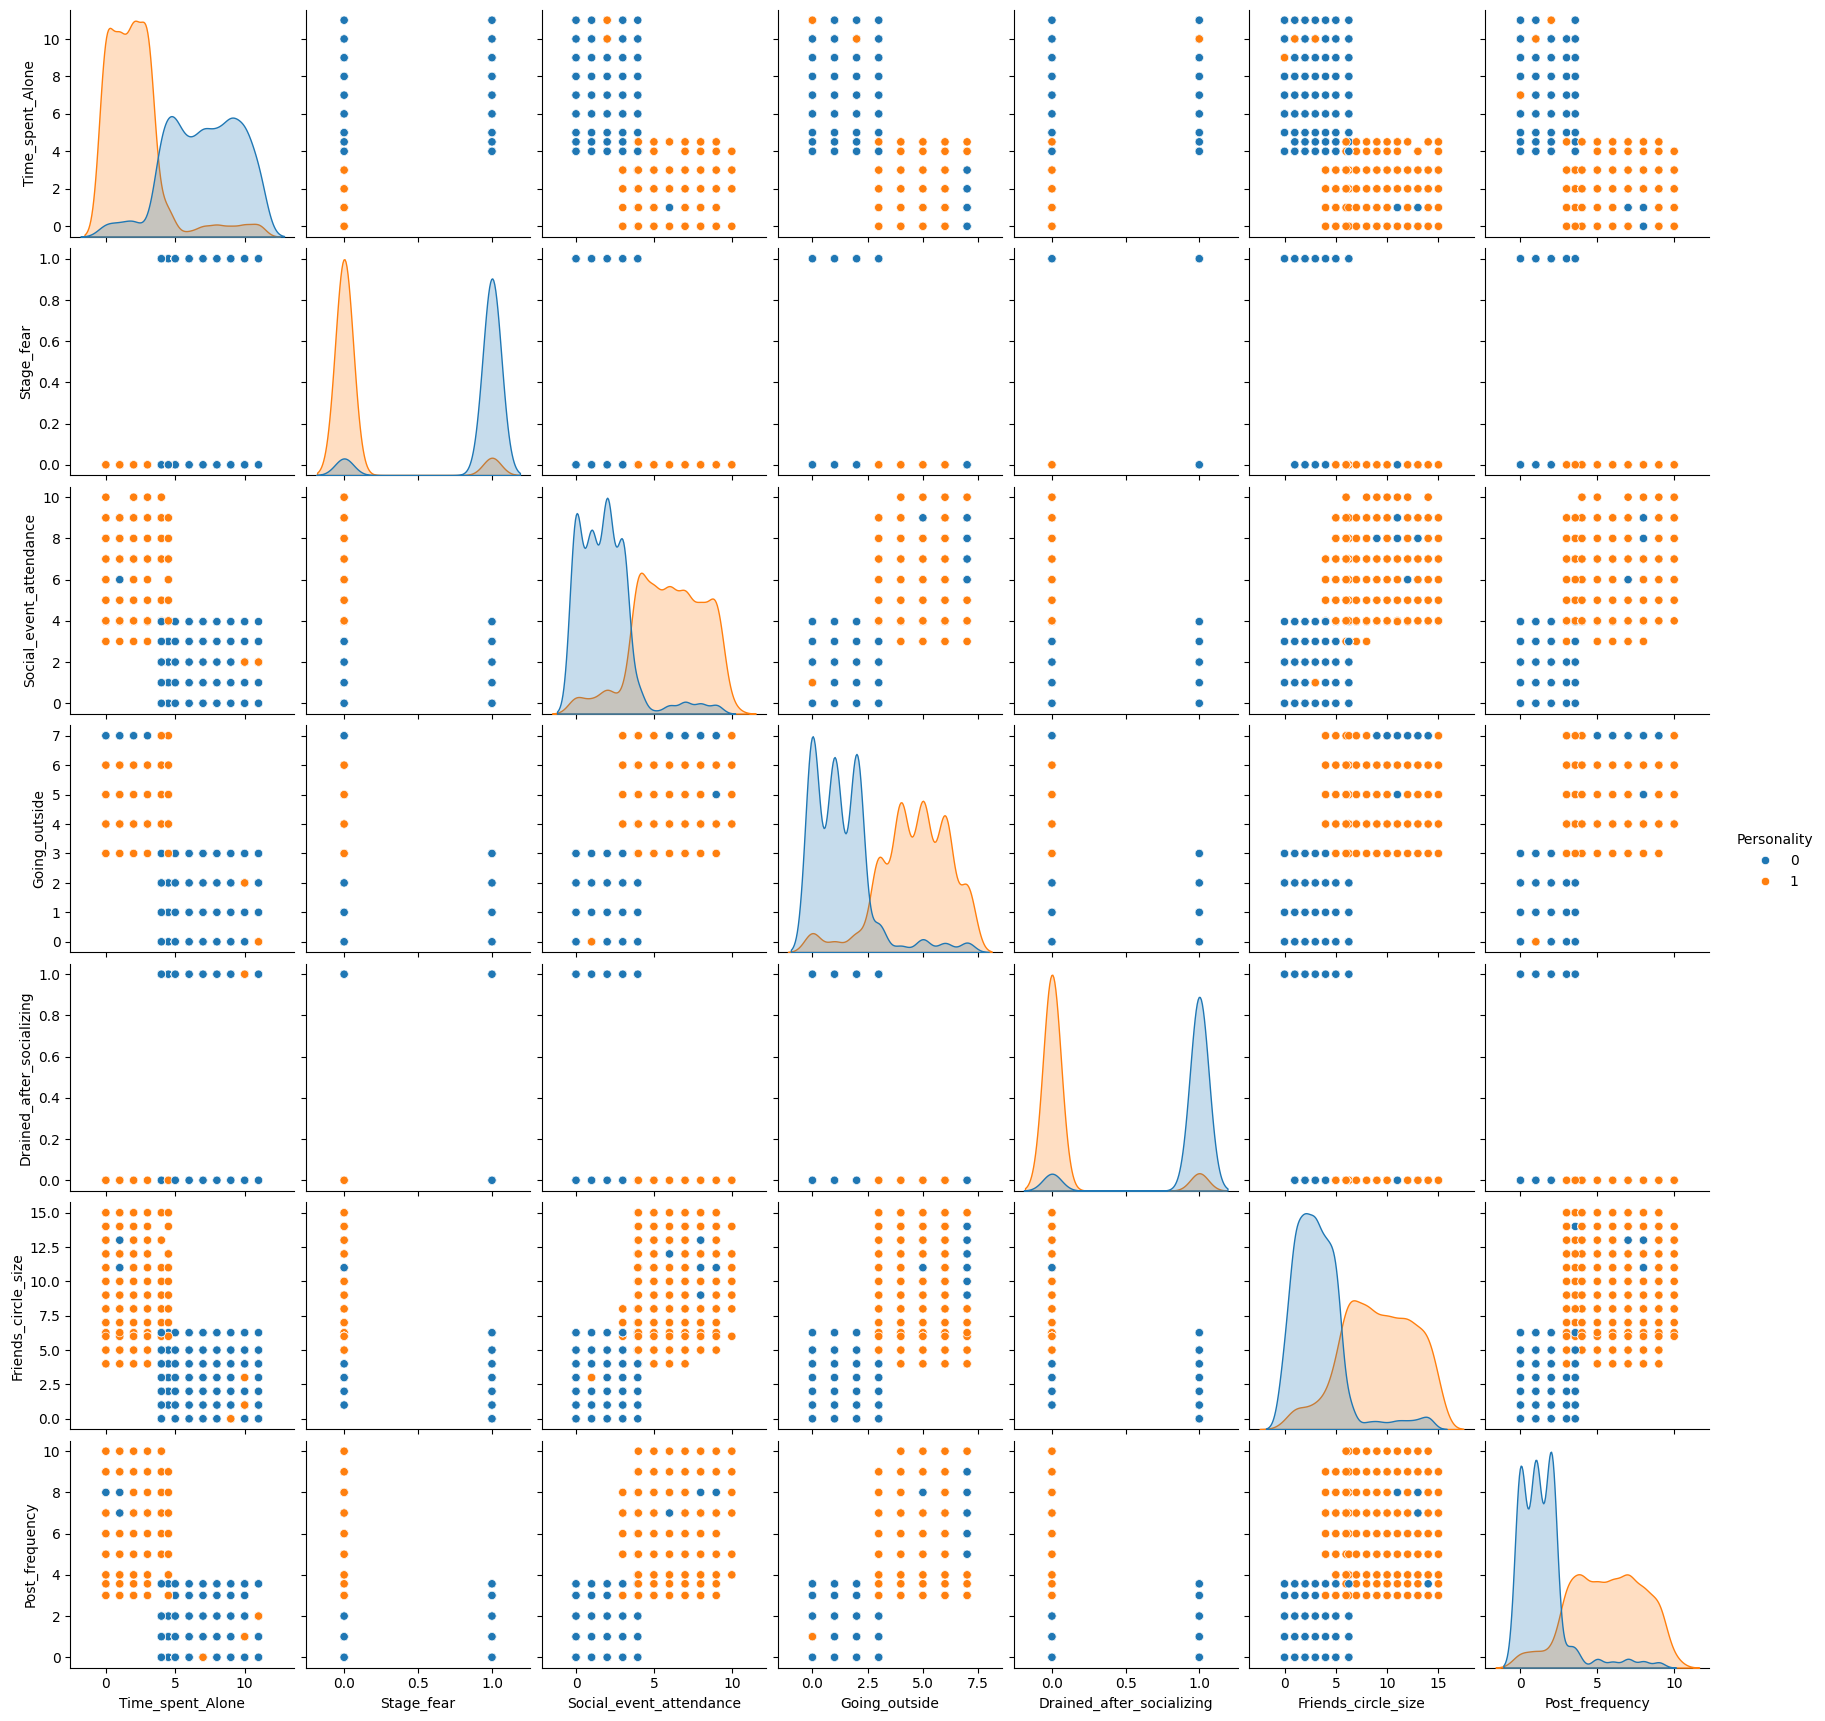

In [34]:
# Create a pair plot for visualizing the data

sns.pairplot(data, hue='Personality')

<Axes: xlabel='Personality', ylabel='Going_outside'>

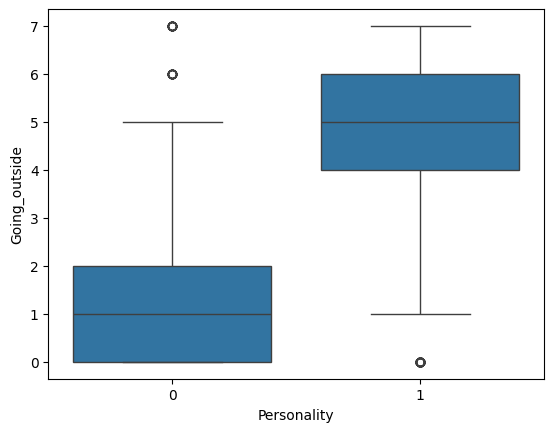

In [38]:
# violin plots of each feature by personality type

sns.boxplot(x='Personality', y='Going_outside', data=data)

<Axes: >

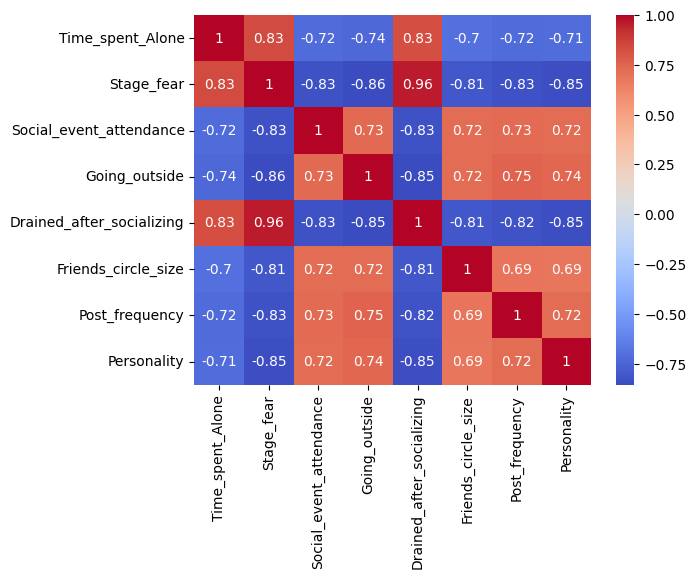

In [39]:
# correlation headmap

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [26]:
# train / test split

X = data[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size','Post_frequency']]
y = data['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# fit the model

model = xgb.XGBClassifier(
    n_estimators=100,      # number of trees
    max_depth=3,           # depth of each tree
    learning_rate=0.1,     # shrinkage rate
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss'
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [28]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9293103448275862
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [29]:
# fit the model with 5 depth

model = xgb.XGBClassifier(
    n_estimators=100,      # number of trees
    max_depth=5,           # depth of each tree
    learning_rate=0.1,     # shrinkage rate
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss'
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [30]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9275862068965517
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [40]:
def model_eval(matrix,model_name):  
  tn = matrix.iloc[0,0]  
  tp = matrix.iloc[1,1]  
  fn = matrix.iloc[1,0]  
  fp = matrix.iloc[0,1]  
  tap = fn+tp  
  tan = tn+fp  
  tpn = tn+fn  
  tpp = fp+tp  
  precision = tp/tpp  
  recall = tp/tap  
  total = tn+tp+fn+fp  
  data = [  
  round((tp+tn)/total,4),  
  round(1-((tp+tn)/total),4),  
  round(tp/tap,4),  
  round(tn/tan,4),  
  round(precision,4),  
  round(2 * (precision * recall) / (precision + recall),4),  
  round(5 * (precision * recall) / ((4 * precision) + recall),4),  
  round(1.25 * (precision * recall) / ((.25 * precision) + recall),4),  
  'Na',  
  'Na'  
   ]  
  return(  
    pd.DataFrame(data, columns=[model_name],   
   index=['Accuracy','Error Rate','Sensitivity','Specificity','Precision','F1','F2','F3','overall_cost','profit_per_customer'])  
    )  

In [47]:
# Running multiple models (that I know) and comparing the accuracy

# Models: XGBoost, Random Forest, Logistic Regression, Decision Tree, Neural Networks, K-Nearest Neighbors, K Means Clustering
# Train the models and evaluate their performance

models = {
    'XGBoost': xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'K Means Clustering': KMeans(n_clusters=2, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Create a confusion matrix
    matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    # print(f"{name} Confusion Matrix:\n{matrix}\n")
    
    # Evaluate the model
    eval_df = model_eval(matrix, name)
    print(eval_df)




XGBoost Accuracy: 0.9276
                    XGBoost
Accuracy             0.9276
Error Rate           0.0724
Sensitivity          0.9172
Specificity          0.9388
Precision            0.9422
F1                   0.9295
F2                   0.9221
F3                   0.9371
overall_cost             Na
profit_per_customer      Na
Random Forest Accuracy: 0.9293
                    Random Forest
Accuracy                   0.9293
Error Rate                 0.0707
Sensitivity                0.9205
Specificity                0.9388
Precision                  0.9424
F1                         0.9313
F2                         0.9248
F3                         0.9379
overall_cost                   Na
profit_per_customer            Na
Logistic Regression Accuracy: 0.9241
                    Logistic Regression
Accuracy                         0.9241
Error Rate                       0.0759
Sensitivity                      0.9205
Specificity                      0.9281
Precision                

<Axes: >

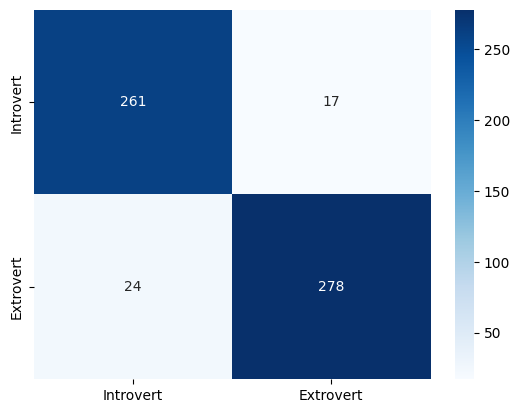

In [ ]:
# confusion matrix for XGBoost

conf_matix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matix, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])